In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#Preparation
Qe = -1
Ve = -1/2 + 2*(0.222246)
Ae = -0.50
Vm = -1/2 + 2*(0.222246)
Am = -0.50
alpha = 1/132.507
GF = 1.16639e-5
MZ = 91.188
GammaZ = 2.4414

XMIN = 0.0
YMIN = 0.0
XMAX = 5.0
YMAX = 5.0

def s_to_E(s):
    return np.sqrt(s)
# Function to calculate chi1(s)
def chi1(s):
    kappa = np.sqrt(2) * GF * MZ**2 / (4 * np.pi * alpha)
    return kappa * s * (s - MZ**2) / ((s - MZ**2)**2 + GammaZ**2 * MZ**2)

# Function to calculate chi2(s)
def chi2(s):
    kappa = np.sqrt(2) * GF * MZ**2 / (4 * np.pi * alpha)
    return kappa**2 * s**2 / ((s - MZ**2)**2 + GammaZ**2 * MZ**2)

# Coefficients A0(s) and A1(s)
def A0(s):
    return Qe**2 - 2 * Qe * Ve * Vm * chi1(s) + (Am**2 + Vm**2) * (Ae**2 + Ve**2) * chi2(s)

def A1(s):
    return -4 * Qe * Am * Ae * chi1(s) + 8 * Am * Vm * Ae * Ve * chi2(s)

# Differential cross section function
def diff_cross_section(s, cos_theta):
    return alpha**2 / (4 * s) * (A0(s) * (1 + cos_theta**2) + A1(s) * cos_theta)

In [80]:
def lego_plot(xAmplitudes, yAmplitudes, nBins, xLabel, yLabel, title):
    x = np.array(xAmplitudes)  # turn x,y data into numpy arrays
    y = np.array(yAmplitudes)  # useful for regular matplotlib arrays

    fig = plt.figure()  # create a canvas, tell matplotlib it's 3d
    ax = fig.add_subplot(111, projection="3d")

    # make histograms - set bins
    hist, xedges, yedges = np.histogram2d(x, y, bins=(nBins, nBins))
    xpos, ypos = np.meshgrid(xedges[:-1] + xedges[1:], yedges[:-1] + yedges[1:])

    xpos = xpos.flatten() / 2.0
    ypos = ypos.flatten() / 2.0
    zpos = np.zeros_like(xpos)

    dx = xedges[1] - xedges[0]
    dy = yedges[1] - yedges[0]
    dz = hist.flatten()

    cmap = mpl.colormaps["jet"]
    max_height = np.max(dz)  # get range of colorbars so we can normalize
    min_height = np.min(dz)
    # scale each z to [0,1], and get their rgb values
    rgba = [cmap((k - min_height) / max_height) for k in dz]

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort="average")
    plt.title(title)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)   
    plt.show()

def plot_histograms(s_values, theta_values, nBins):
    # Plot histogram for S
    plt.figure(figsize=(10, 4))
    plt.hist(s_values, bins=nBins, color='skyblue', edgecolor='black')
    plt.title('Histogram of S Values')
    plt.xlabel('S')
    plt.ylabel('Frequency')
    plt.show()

    # Plot histogram for E
    plt.figure(figsize=(10, 4))
    plt.hist(s_to_E(s_values), bins=nBins, color='lightcoral', edgecolor='black')
    plt.title('Histogram of E Values')
    plt.xlabel('E')
    plt.ylabel('Frequency')
    plt.show()

    # Plot histogram for theta
    plt.figure(figsize=(10, 4))
    plt.hist(theta_values, bins=nBins, color='lightgreen', edgecolor='black')
    plt.title('Histogram of Cosine(Theta) Values')
    plt.xlabel('Cos(Theta)')
    plt.ylabel('Frequency')
    plt.show()

    # Plot histogram for cos(theta)
    plt.figure(figsize=(10, 4))
    plt.hist(np.arccos(theta_values), bins=nBins, color='salmon', edgecolor='black')
    plt.title('Histogram of Theta Values')
    plt.xlabel('Theta')
    plt.ylabel('Frequency')
    plt.show()

In [81]:
s_min, s_max = 10**2, 200**2
COSTHETAMIN, COSTHETAMAX = -1, 1

# # Sampling differential cross-section over the domain to find the maximum value
# sampled_values = []
# for _ in range(100000):
#     random_s = np.random.uniform(s_min, s_max)
#     random_cos_theta = np.random.uniform(cos_theta_min, cos_theta_max)
#     value = diff_cross_section(random_s, random_cos_theta)
#     sampled_values.append(value)

# F_VAL_MAX = max(sampled_values)
F_VAL_MAX = 6.78765661236851e-07
            
#Part a
def brute_force(nPoints, seed=None):
    nFunctionEval = 0
    s_rej_method = []
    cos_theta_rej_method = []
    maxWeightEncounteredRej = -1.0e20
    generator = np.random.RandomState(seed=seed)
    
    while len(s_rej_method) < nPoints:
        rr = generator.uniform(size=3)
        random_s = np.random.uniform(s_min, s_max)
        random_cos_theta = np.random.uniform(COSTHETAMIN, COSTHETAMAX)
        random_value = np.random.uniform(0, F_VAL_MAX)
        nFunctionEval += 1
        f_val = diff_cross_section(random_s, random_cos_theta)
        if f_val > maxWeightEncounteredRej:
            maxWeightEncounteredRej = f_val
        if f_val > F_VAL_MAX:
            print(
                f" f_val={f_val} exceeds F_VAL_MAX={F_VAL_MAX}, program will now exit"
            )
            exit(99)
        if f_val / F_VAL_MAX > rr[2]:
            s_rej_method.append(random_s)
            cos_theta_rej_method.append(random_cos_theta)
    return (s_rej_method, cos_theta_rej_method, nFunctionEval, maxWeightEncounteredRej)

s_rej_method, cos_theta_rej_method, nFunctionEval_rej, maxWeightEncounteredReJ = brute_force(10000)
print(nFunctionEval_rej)


662891


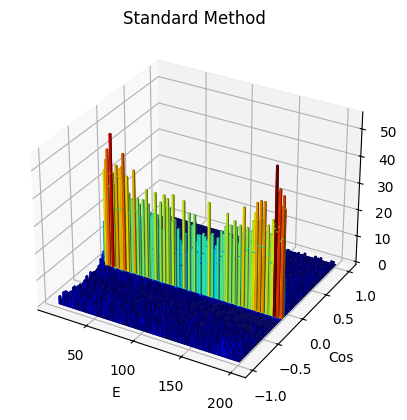

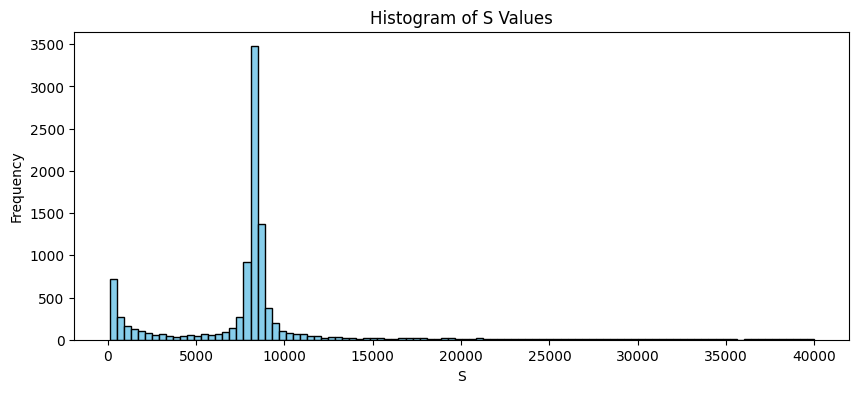

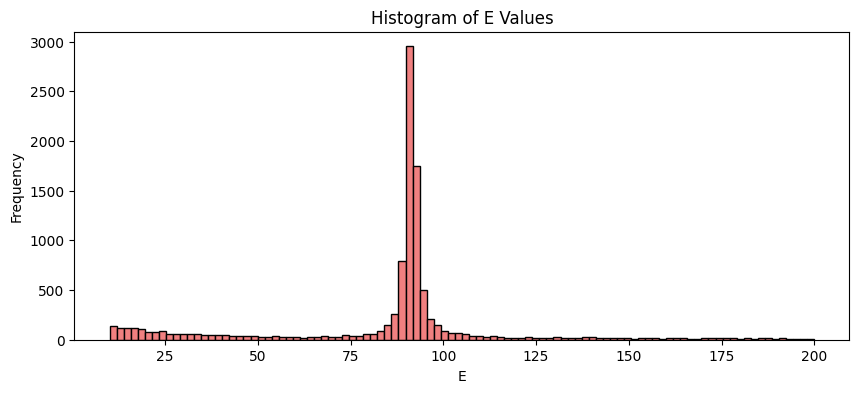

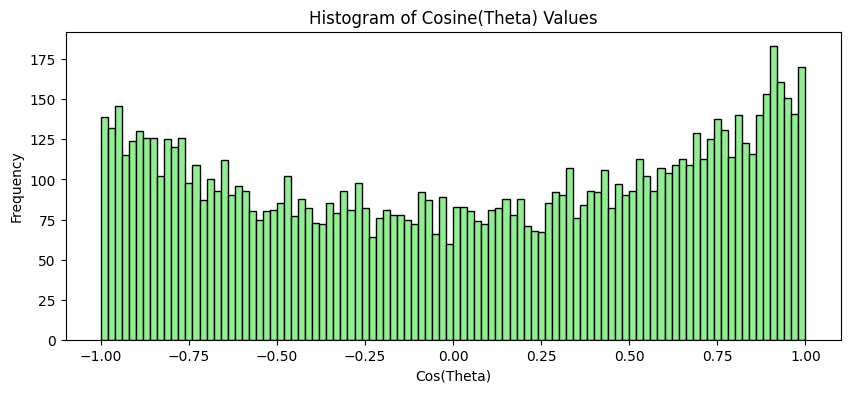

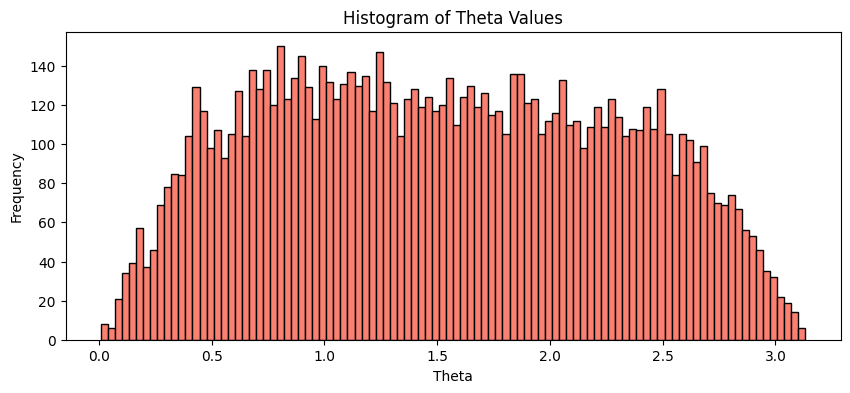

In [83]:
lego_plot(np.sqrt(s_rej_method), cos_theta_rej_method, 100, "E", "Cos", "Standard Method")
plot_histograms(s_rej_method, cos_theta_rej_method, 100)

In [72]:
  #part b
"""def setup_intervals_ours(NN=100, KK=2000, nIterations=4000, alpha_damp=1.5, seed=None):
    # Define the domain boundaries
    SMIN, SMAX = 10**2, 200**2
    COSTHETAMIN, COSTHETAMAX = -1, 1  

   # Initialize intervals with uniform spacing
    sLow = np.linspace(SMIN, SMAX, NN + 1)
    cosLow = np.linspace(COSTHETAMIN, COSTHETAMAX, NN + 1)

   # Initialize weights for intervals (uniform at start)
    weights_s = np.ones(NN)
    weights_cos = np.ones(NN)

     # Random number generator
    rng = np.random.RandomState(seed)
    delx =  np.ones(NN) * (s_max - s_min) / NN
    dely = np.ones(NN) * (COSTHETAMAX - COSTHETAMIN) / NN
     # Iteratively adjust intervals based on function evaluations
    for _ in range(nIterations):
        # Randomly choose intervals based on current weights
        chosen_intervals_s = rng.choice(NN, size=KK, p=weights_s / weights_s.sum())
        chosen_intervals_cos = rng.choice(NN, size=KK, p=weights_cos / weights_cos.sum())

        # Sample within chosen intervals and evaluate the function
        samples_s = sLow[chosen_intervals_s] + rng.rand(KK) * delx[chosen_intervals_s]
        samples_cos = cosLow[chosen_intervals_cos] + rng.rand(KK) * dely[chosen_intervals_cos]
        f_vals = diff_cross_section(samples_s, samples_cos)  # Your differential cross-section function

         # Adjust weights based on function evaluations and damping
        for i in range(NN):
            interval_mask_s = chosen_intervals_s == i
            interval_mask_cos = chosen_intervals_cos == i
            weights_s[i] *= alpha_damp + (f_vals[interval_mask_s].sum() / KK)
            weights_cos[i] *= alpha_damp + (f_vals[interval_mask_cos].sum() / KK)

         # Normalize weights to maintain the same total interval size
        weights_s /= weights_s.sum() / NN
        weights_cos /= weights_cos.sum() / NN

         # Recalculate interval boundaries based on new weights
        sLow[1:-1] = np.cumsum(weights_s[:-1]) * (SMAX - SMIN) / NN + SMIN
        cosLow[1:-1] = np.cumsum(weights_cos[:-1]) * (COSTHETAMAX - COSTHETAMIN) / NN + COSTHETAMIN
        
        delx = np.diff(sLow)
        dely = np.diff(cosLow)

    return sLow, cosLow, delx, dely"""

In [77]:
def setup_intervals_lab(NN=100, KK=2000, nIterations=4000, alpha_damp=1.5, seed=None):
    """
    Input:
        NN: Number of intervals in [XMIN, XMAX] or [YMIN, YMAX]
        KK: function evaluations per iteration
        nIterations: number of iterations
        alpha_damp: damping parameter in the Vegas algorithm
    Return:
        Intervals specified by xLow, yLow: each is a 1D numpy array of size NN+1, with
        xLow[0] = 0, xLow[NN] = ym; yLow[0] = 0, yLow[NN] = ym
    """

    # intitial intervals: uniform intervals between XMIN/YMIN and XMAX/YMAX
    #sLow = SMIN + (SMAX - SMIN) / NN * np.arange(NN + 1)
    sLow = np.linspace(s_min, s_max, NN + 1)
    del_x = np.ones(NN) * (s_max - s_min) / NN
    p_s = np.ones(NN) / (s_max - s_min)  # probability density in each interval

    costhetaLow = np.linspace(COSTHETAMIN, COSTHETMAX, NN + 1)
    del_costheta = np.ones(NN) * (COSTHETAMIN - COSTHETAMAX) / NN
    p_costheta = np.ones(NN) / (COSTHETAMAX - COSTHETAMIN)
    
    generator = np.random.RandomState(seed=seed)
    for _ in range(nIterations):
        ixLow = generator.randint(0, NN, size=KK)
        xx = sLow[ixLow] + del_x[ixLow] * generator.uniform(size=KK)
        iyLow = generator.randint(0, NN, size=KK)
        yy = costhetaLow[iyLow] + del_costheta[iyLow] * generator.uniform(size=KK)
        ff = diff_cross_section(xx, yy)
        f2barx = np.array(
            [sum((ff[ixLow == i] / p_costheta[iyLow[ixLow == i]]) ** 2) for i in range(NN)]
        )
        fbarx = np.sqrt(f2barx)
        f2bary = np.array(
            [sum((ff[iyLow == i] / p_s[ixLow[iyLow == i]]) ** 2) for i in range(NN)]
        )
        fbary = np.sqrt(f2bary)
        fbardelxSum = np.sum(fbarx * del_x)
        fbardelySum = np.sum(fbary * del_costheta)
        logArgx = fbarx * del_x / fbardelxSum
        logArgy = fbary * del_costheta / fbardelySum
        mmx = KK * pow((logArgx - 1) / np.log(logArgx), alpha_damp)
        mmx = mmx.astype(int)
        mmx = np.where(mmx > 1, mmx, 1)
        mmy = KK * pow((logArgy - 1) / np.log(logArgy), alpha_damp)
        mmy = mmy.astype(int)
        mmy = np.where(mmy > 1, mmy, 1)
        xLowNew = [sLow[i] + np.arange(mmx[i]) * del_x[i] / mmx[i] for i in range(NN)]
        xLowNew = np.concatenate(xLowNew, axis=0)
        yLowNew = [costhetaLow[i] + np.arange(mmy[i]) * del_costheta[i] / mmy[i] for i in range(NN)]
        yLowNew = np.concatenate(yLowNew, axis=0)
        nCombx = int(len(xLowNew) / NN)
        nComby = int(len(yLowNew) / NN)
        i = np.arange(NN)
        sLow[:-1] = xLowNew[i * nCombx]
        costhetaLow[:-1] = yLowNew[i * nComby]
        del_x = np.diff(sLow)
        del_costheta = np.diff(costhetaLow)
        p_costheta = 1.0 / del_x / NN
        p_s = 1.0 / del_costheta / NN

    return sLow, costhetaLow, del_x, del_costheta

In [78]:
"""def vegas_ours(nPoints, vegasRatioFactor, NN, KK, nIterations, alpha_damp, seed=None):
    # Setup initial intervals using the setup_intervals function
    COSTHETAMIN, COSTHETAMAX = -1, 1  
    
    sLow, cosLow, delx, dely = setup_intervals_ours(NN, KK, nIterations, alpha_damp, seed)
    vegasRatioMax = vegasRatioFactor * F_VAL_MAX * NN * NN * delx[NN - 2] * dely[NN - 2]

    # Initialize variables
    nFunctionEval = 0
    s = []
    cos = []
    maxWeightEncountered = -1.0e20

    # Random number generator
    rng = np.random.RandomState(seed)

    # Main loop for sampling and evaluating
    while len(s) < nPoints:
        # Sample points within the refined intervals
        ixLow = rng.randint(0, NN)
        iyLow = rng.randint(0, NN)
        ss = sLow[ixLow] + delx[ixLow] * rng.uniform()
        cosT = cosLow[iyLow] + dely[iyLow] * rng.uniform()

        # Evaluate the differential cross-section at the sampled points
        f_vals = diff_cross_section(ss, cosT)
        ratio = f_vals * NN * NN * delx[ixLow] * dely[iyLow]
        nFunctionEval +=1

        # Update the maximum weight encountered, if necessary
        max_f_val = np.max(f_vals)
        if max_f_val > maxWeightEncountered:
            maxWeightEncountered = max_f_val

        # Store points based on the acceptance criterion
        # Accept the point if the Vegas ratio exceeds the vegasRatioFactor threshold
        if ratio > vegasRatioMax:
            print(f"ratio={ratio} exceeds vegasRatioMax={vegasRatioMax}, yy={cosT} program will now exit ")
        if ratio / vegasRatioMax > rng.uniform():
            s.append(ss)
            cos.append(cosT)

    # Prepare the output
    output = (
        s,
        cos,
        nFunctionEval,
        maxWeightEncountered,
        vegasRatioFactor * max_f_val,  # Maximum Vegas ratio considered for acceptance
    )
    
    return output
"""


In [108]:
def vegas_lab(
    nPoints,
    vegasRatioFactor,
    NN=100,
    KK=2000,
    nIterations=4000,
    alpha_damp=1.5,
    seed=None,
):
    xLow, yLow, delx, dely = setup_intervals_lab(NN, KK, nIterations, alpha_damp, seed)
    vegasRatioMax = vegasRatioFactor * F_VAL_MAX * NN * NN * delx[NN - 2] * dely[NN - 2]
    nFunctionEval = 0
    yy1_vegas_method = []
    yy2_vegas_method = []
    yy1_vrho_method = []
    yy2_vrho_method = []
    maxWeightEncountered = -1.0e20
    
    generator = np.random.RandomState(seed=seed)
    while len(yy1_vegas_method) < nPoints:
        ixLow = generator.randint(0, NN)
        xx = xLow[ixLow] + delx[ixLow] * generator.uniform()
        iyLow = generator.randint(0, NN)
        yy = yLow[iyLow] + delx[iyLow] * generator.uniform()
        yy1_vrho_method.append(xx)
        yy2_vrho_method.append(yy)
        nFunctionEval += 1
        f_val = diff_cross_section(xx, yy)
        ratio = f_val * NN * NN * delx[ixLow] * dely[iyLow]
        if ratio > maxWeightEncountered:
            maxWeightEncountered = ratio
        if ratio > vegasRatioMax:
            print(
                f"ratio={ratio} exceeds vegasRatioMax={vegasRatioMax}, yy={yy} program will now exit "
            )
            exit(99)
        if ratio / vegasRatioMax > generator.uniform():
            yy1_vegas_method.append(xx)
            yy2_vegas_method.append(yy)
     return (
        yy1_vegas_method,
        yy2_vegas_method,
        nFunctionEval,
        maxWeightEncountered,
        vegasRatioMax,
    )

In [79]:
s_vegas, cos_vegas, nFunctionalEval_vegas, maxweightEncounteredvegas, vegasRatioFactor = vegas(10000, 1, 50, 1000, 500, 1.5)
print(nFunctionalEval_vegas)
print(vegasRatioFactor)
print(maxweightEncounteredvegas)

NameError: name 'THETAMIN' is not defined

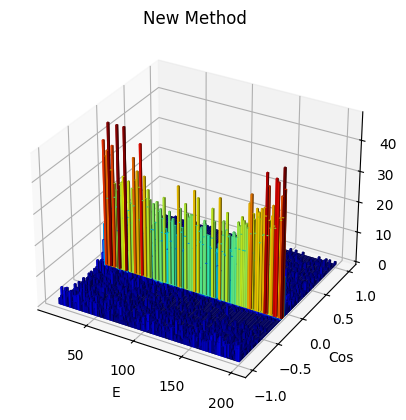

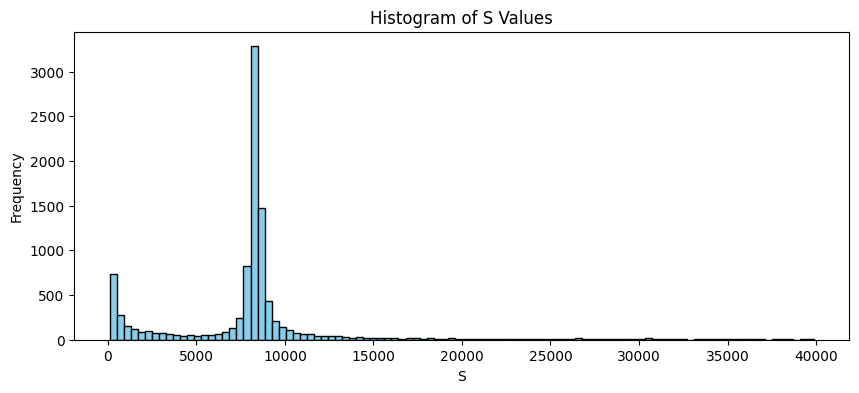

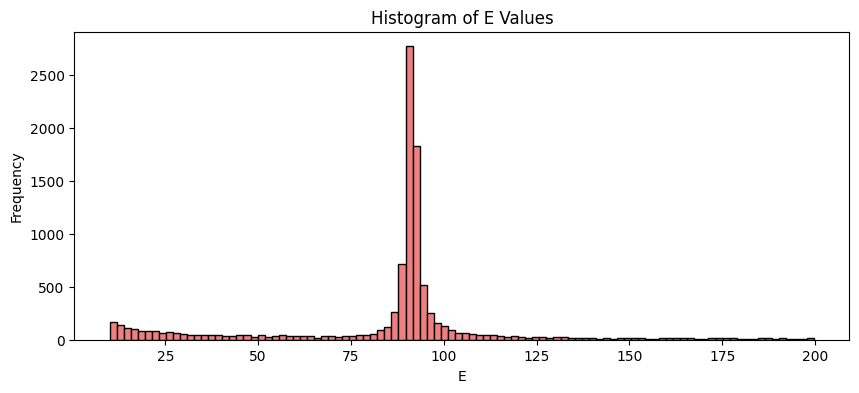

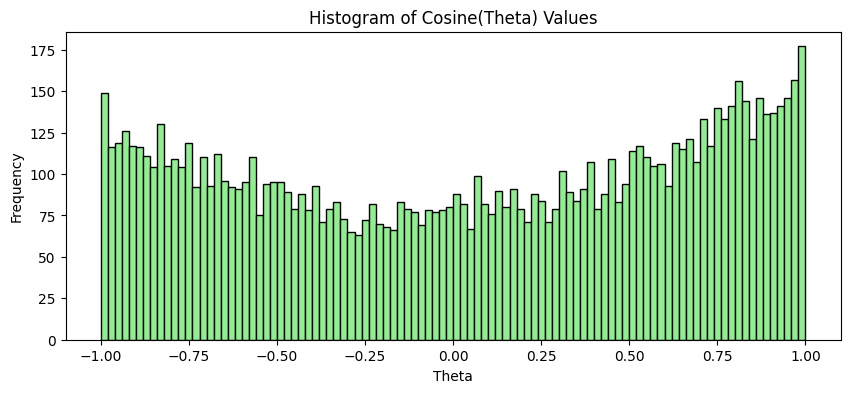

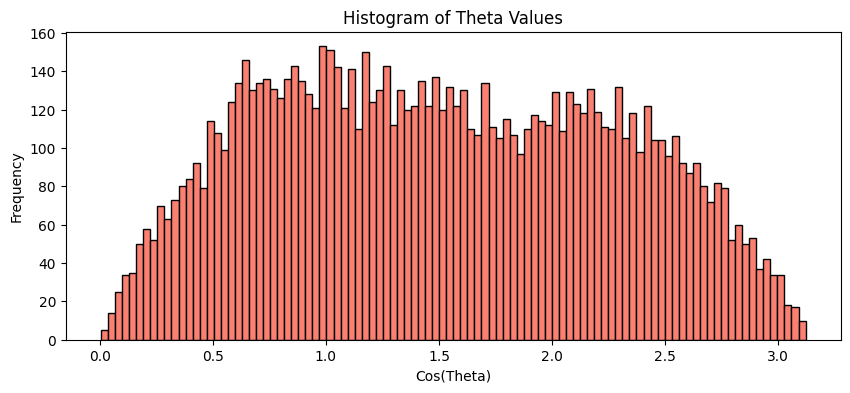

In [76]:
lego_plot(np.sqrt(s_vegas), cos_vegas, 100, "E", "Cos", "New Method")
plot_histograms(s_vegas, cos_vegas, 100)

In [118]:
import time
n_events = 10000
start_time_ar = time.time()
s_rej_method, cos_theta_rej_method, nFunctionEval_rej, maxWeightEncounteredReJ= brute_force(n_events)
end_time_ar = time.time()
time_ar = end_time_ar - start_time_ar

start_time_vegas = time.time()
s_vegas, cos_vegas, nFunctionalEval_vegas, maxweightEncounteredvegas,vegasRatioFactor = vegas(n_events,0.1,100,2000,4000,1.5)
end_time_vegas = time.time()
time_vegas = end_time_vegas - start_time_vegas

print("Acceptance-Rejection Method:")
print(f"Number of function evaluations: {nFunctionEval_rej}")
print(f"Time taken: {time_ar} seconds")

print("\nVEGAS Method:")
print(f"Time taken: {time_vegas} seconds")
print(f"Number of function evaluations: {nFunctionalEval_vegas}")

C:\Users\Nedal\AppData\Local\Temp\ipykernel_22488\1050001430.py:43: RuntimeWarning: invalid value encountered in log
  mmx = KK * pow((logArgx - 1) / np.log(logArgx), alpha_damp)
C:\Users\Nedal\AppData\Local\Temp\ipykernel_22488\1050001430.py:44: RuntimeWarning: invalid value encountered in cast
  mmx = mmx.astype(int)


Acceptance-Rejection Method:
Number of function evaluations: 645880
Time taken: 14.47813606262207 seconds

VEGAS Method:
Time taken: 31.57294487953186 seconds
Number of function evaluations: 431915


C:\Users\Nedal\AppData\Local\Temp\ipykernel_22488\1050001430.py:43: RuntimeWarning: invalid value encountered in log
  mmx = KK * pow((logArgx - 1) / np.log(logArgx), alpha_damp)
C:\Users\Nedal\AppData\Local\Temp\ipykernel_22488\1050001430.py:44: RuntimeWarning: invalid value encountered in cast
  mmx = mmx.astype(int)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


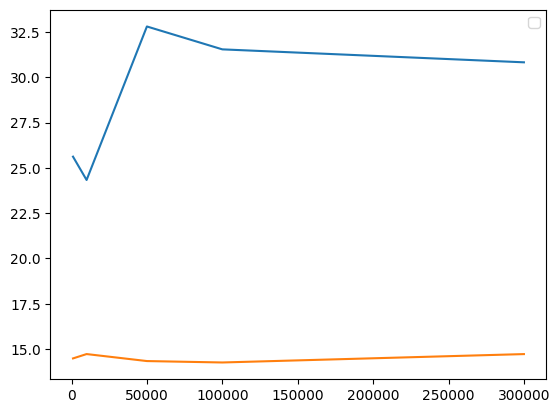

In [119]:
events = [1000,10000,50000,100000,300000]
ar_times = []
vegas_times = []
for i in enumerate(events):
    start_time_ar = time.time()
    s_rej_method, cos_theta_rej_method, nFunctionEval_rej, maxWeightEncounteredReJ= brute_force(n_events)
    end_time_ar = time.time()
    time_ar = end_time_ar - start_time_ar
    ar_times.append(time_ar)

    start_time_vegas = time.time()
    s_vegas, cos_vegas, nFunctionalEval_vegas, maxweightEncounteredvegas,vegasRatioFactor = vegas(n_events,0.1,100,2000,4000,1.5)
    end_time_vegas = time.time()
    time_vegas = end_time_vegas - start_time_vegas
    vegas_times.append(time_vegas)
plt.plot(events,vegas_times)
plt.plot(events,ar_times)
plt.legend()
plt.show()

10
100
1000
10000
100000
300000
700000
1000000
